In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-dataset/train-images.idx3-ubyte
/kaggle/input/mnist-dataset/t10k-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images.idx3-ubyte
/kaggle/input/mnist-dataset/train-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte
/kaggle/input/mnist-dataset/train-labels-idx1-ubyte/train-labels-idx1-ubyte
/kaggle/input/mnist-dataset/train-images-idx3-ubyte/train-images-idx3-ubyte


# Derin Öğrenme Nedir?

#### Derin Öğrenme (Deep learning) yapay zekanın bir alanı olan makine ögrenmesinin gelişmiş bir dalıdır. Karmaşık yapıları ve kalıpları çözümlemek için kullanılır ve özellikle yapay sinir agları( Artificial Neural Network) gibi yapılar  ile çalışır.

## Yapay Sinir Ağı(Artificial Neural Network)
    
#### Yapay sinir agı, her bir nöronun bilgi işlem birimini temsil ettigi, birbirine bağlı yapay nöronlardan dügümlerden oluşan bir ağdır. Birbirine bağlı dügümler insan beynini taklit ederek bilgileri birbirine aktarır.
### Dügümler birbiriyle etkileşime girer ve bilgi paylaşır. Her düğüm girdi alır ve iletmeden önce bazı işlemler yapar. Bu işlemler aktivasyon fonksiyonu alarak girdiyi daha sonra diger dügümler için girdi olarak kullanılacak çıktıya dönüştürür.
#### Dügümler arasında belirli agırlıklar (Weight) vardır. Bu agırlıklar modelin her ögrenme turunda degişir. Bu agırlıklar nöronlar arasındaki bağlantının gücünü temsil eder. Her turda geri besleme ile doğruluğunu arttırmak adına güncellenir. 

#### Giriş katmanı, Gizli Katman ve Çıkış Katmanı bulunmaktadır.Gizli katmanların ve içerisindeki düğümlerin artması genellikle doğruluk oranını arttırır fakat çok fazla hesaplama gücü gerektirir.Bazı durumlarda gizli katman sayısını arttırmak beklenenin aksine doğruluğu düşürür.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


import struct
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

## Veri Setini Tanıma
#### * MNIST, El yazısı rakamların (0-9) görüntülerini içeriyor.
#### * 10 benzersiz işaret vardır.
#### * 28x28 piksel boyutundadır.
#### * 60,000 örnek egitim veri seti ve 10,000 test veri seti bulunmaktadır.
#### * Yann Lecun ve ekibi tarafından geliştirilen, makine öğrenimi ve derin öğrenme için yaygın kullanılan veri setlerinden biri.

In [32]:
train_images_path = '/kaggle/input/mnist-dataset/train-images.idx3-ubyte'
train_labels_path = '/kaggle/input/mnist-dataset/train-labels.idx1-ubyte'
test_images_path = '/kaggle/input/mnist-dataset/t10k-images.idx3-ubyte'
test_labels_path = '/kaggle/input/mnist-dataset/t10k-labels.idx1-ubyte'

# IDX formatında dosyaları yüklemek için
def load_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

In [34]:
# Veriler yüklenmektedir.

X_train = load_idx(train_images_path)
y_train = load_idx(train_labels_path)
X_test = load_idx(test_images_path)
y_test = load_idx(test_labels_path)

#Verilerin boyutlarını kontrol etme

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


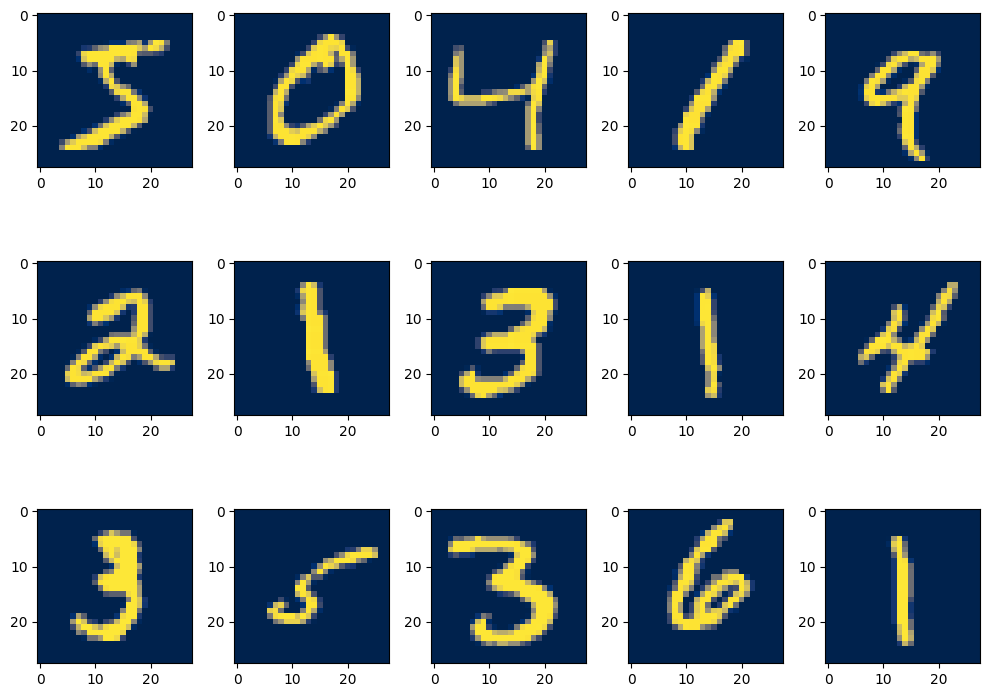

In [36]:
# verinin gösterilmesi

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(4,5,i+1)
    plt.imshow(X_train[i], cmap='cividis')

plt.tight_layout()
plt.show()

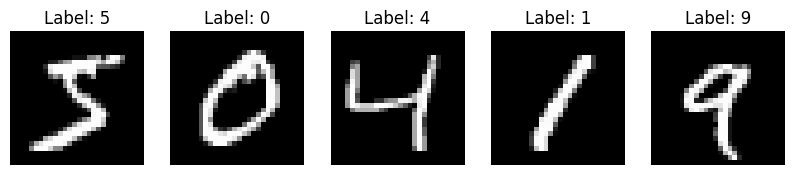

In [38]:
#görüntü ve etiketlerin gösterilmesi

def plot_imagess(images,labels,num_image=5):
    plt.figure(figsize=(10,5))
    for i in range(num_image):
        plt.subplot(1,num_image, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.show()

plot_imagess(X_train, y_train)
        

## Flatten işlemi ve Normalizasyon

In [39]:
# Görselleri 28x28 boyutlarından flatten işlemi ve normalize yapma
# her bir görüntü 28*28 matrisden 784 vektöre dönüştürülür
# astype  float32 'ye dönüştürülür ve daha düşük bellek ve yüksek hassasiyet saglar'
# /225  0-225 arasındaki piksel değerini 0-1 aralıgına dönüştürür.

X_train= X_train.reshape((X_train.shape[0], 28*28)).astype('float32')/225
X_test= X_test.reshape((X_test.shape[0], 28*28)).astype('float32')/225

In [40]:
#boyutları inceleyelim

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (60000, 784)
X_test shape: (10000, 784)


In [41]:
# Egitim ve test olarak ayırma
X_train,X_Test, y_train, y_Test= train_test_split( X_train,y_train,train_size=0.2,random_state=42)

In [42]:
#Sınıfları  encoding yapma
y_train= tf.keras.utils.to_categorical(y_train,10)
y_Test= tf.keras.utils.to_categorical(y_Test,10)
y_test= tf.keras.utils.to_categorical(y_test,10)

### One-Hot Ecoding
 #### Sınıflandırma problemlerinde hedef değişkenlerin model tarafından daha iyi anlaşilmasını sağlar.
 #### One-hot işlemi sonucu etiketler aşagıdaki gibi görünmektedir.
  
 #### [1, 0, 0, 0, 0, 0, 0, 0, 0, 0] --> Sınıf 0
 #### [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],--> Sınıf 2
 #### [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],--> Sınıf 1
 #### [0, 0, 0, 0, 0, 0, 0, 0, 0, 1] --> Sınıf 9
 

In [43]:
y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

## Model Oluşturma


In [44]:
#Input Katmanı
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(28*28,)))

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))

In [45]:
#Gizli Katman
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))

#Çıktı katmanı
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [46]:
# Modelin derlenmesi
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
early_stopping= tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights= True,
    verbose= 1
    )

In [48]:
#modeli egitimi
results= model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_Test,y_Test))

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.5532 - loss: 1.3461 - val_accuracy: 0.9166 - val_loss: 0.2807
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.8972 - loss: 0.3651 - val_accuracy: 0.9326 - val_loss: 0.2233
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9293 - loss: 0.2401 - val_accuracy: 0.9460 - val_loss: 0.1746
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9473 - loss: 0.1786 - val_accuracy: 0.9520 - val_loss: 0.1616
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9602 - loss: 0.1416 - val_accuracy: 0.9560 - val_loss: 0.1506
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9633 - loss: 0.1176 - val_accuracy: 0.9582 - val_loss: 0.1436
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9720 - loss: 0.0965 - val_accuracy: 0.9598 - val_loss: 0.1384
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9733 - loss: 0.0856 - val_accuracy: 0.9619 - v

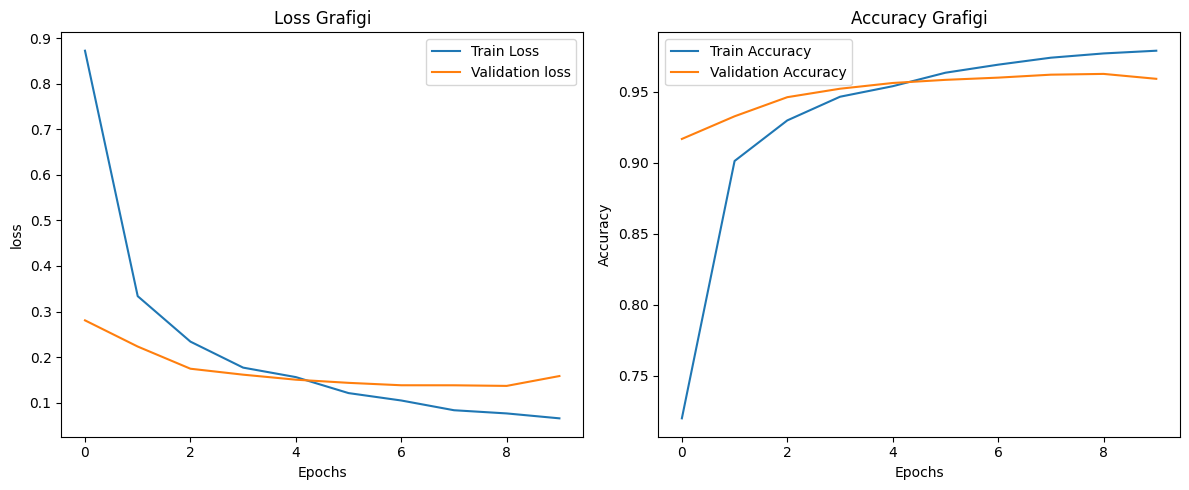

In [49]:
#egitim sonuçlarını görselleştirme
plt.figure(figsize=(12,5))

#loss grafigi
plt.subplot(1,2,1)
plt.plot(results.history['loss'],label='Train Loss')
plt.plot(results.history['val_loss'],label= 'Validation loss')
plt.title('Loss Grafigi')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()


#Accuracy grafigi
plt.subplot(1,2,2)
plt.plot(results.history['accuracy'],label='Train Accuracy')
plt.plot(results.history['val_accuracy'],label= 'Validation Accuracy')
plt.title('Accuracy Grafigi')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### Model Tahmini

In [50]:
y_prediction= model.predict(X_test)
y_prediction_classes= np.argmax(y_prediction, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [51]:
#modelin degerlendirilmesi
test_loss, test_accuracy= model.evaluate(X_test,y_test, verbose=0)
print('Loss:',test_loss)
print('Accuracy:', test_accuracy)

Loss: 0.14767801761627197
Accuracy: 0.9595000147819519


In [52]:
 Evaluation=pd.DataFrame(['Normal'],columns=['Yapay sinir Ağı'])
 Evaluation.loc[0,'Accuracy']= test_accuracy
 Evaluation

,Yapay sinir Ağı,Accuracy
0,Normal,0.9595


## Model Katman ve Nöron sayısını Değiştirme

#### 1.Katman sayısını arttırma

In [53]:
#Input Katmanı
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Input(shape=(28*28,)))

model1.add(tf.keras.layers.Dense(512, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.3))

In [54]:
#Gizli Katman
model1.add(tf.keras.layers.Dense(128, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.3))
model1.add(tf.keras.layers.Dense(128, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.3))
model1.add(tf.keras.layers.Dense(128, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.3))

#Çıktı katmanı
model1.add(tf.keras.layers.Dense(10,activation='softmax'))

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
#modeli egitimi
results1= model1.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_Test,y_Test))

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.4293 - loss: 1.6248 - val_accuracy: 0.9005 - val_loss: 0.3327
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.8734 - loss: 0.4264 - val_accuracy: 0.9308 - val_loss: 0.2389
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9157 - loss: 0.2935 - val_accuracy: 0.9418 - val_loss: 0.2005
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9358 - loss: 0.2280 - val_accuracy: 0.9495 - val_loss: 0.1772
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9555 - loss: 0.1583 - val_accuracy: 0.9533 - val_loss: 0.1680
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9589 - loss: 0.1413 - val_accuracy: 0.9559 - val_loss: 0.1616
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9629 - loss: 0.1261 - val_accuracy: 0.9604 - val_loss: 0.1482
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9668 - loss: 0.1183 - val_accuracy: 0.9598 - v

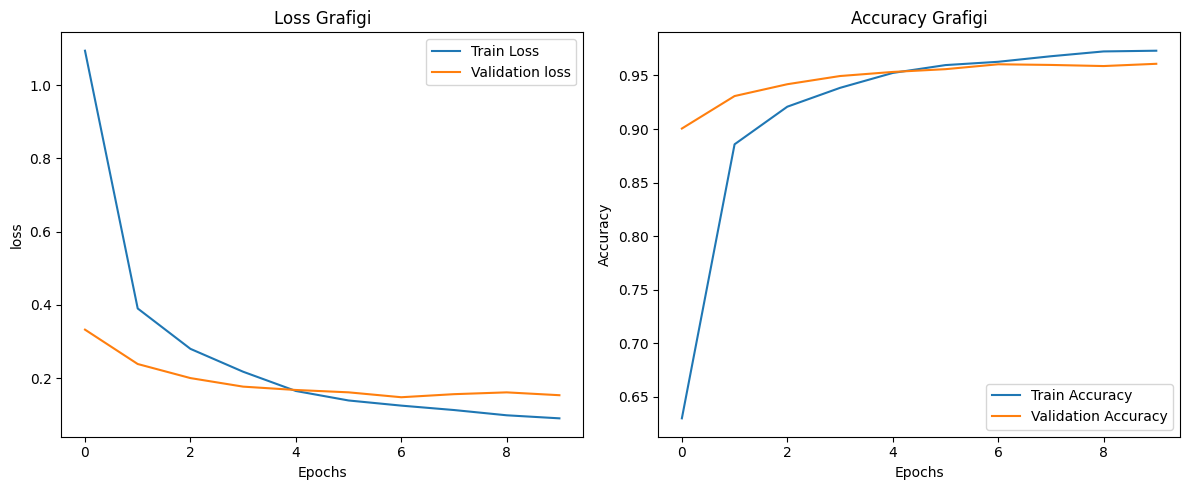

In [56]:
#egitim sonuçlarını görselleştirme
plt.figure(figsize=(12,5))

#loss grafigi
plt.subplot(1,2,1)
plt.plot(results1.history['loss'],label='Train Loss')
plt.plot(results1.history['val_loss'],label= 'Validation loss')
plt.title('Loss Grafigi')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()


#Accuracy grafigi
plt.subplot(1,2,2)
plt.plot(results1.history['accuracy'],label='Train Accuracy')
plt.plot(results1.history['val_accuracy'],label= 'Validation Accuracy')
plt.title('Accuracy Grafigi')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#### Loss grafiginde,epoch degeri arttikça loss degeri düşmektedir.hata degeri azalmaktadir.Accuracy grafiginde,epoch degeri veriyi egittikçe arccuracy degeri dogruluk değeri artmaktadir.
#### Aşırı Öğrenme (Overfitting):Eğitim kaybı sürekli azalırken doğrulama kaybı artmaya başlıyorsa. Eğitim doğruluğu yüksek ve doğrulama doğruluğu düşük kalıyorsa.Genellikle daha fazla epoch eğitim yapıldıkça ortaya çıkar.
#### Eksik Öğrenme (Underfitting):Eğitim ve doğrulama kaybı yüksek kalıyorsa ve düşmüyorsa. Eğitim ve doğrulama doğrulukları düşük kalıyorsa. Genellikle model yeterince karmaşık olmadığında veya eğitim süresi kısa olduğunda görülür.ür.

In [57]:
y_prediction= model1.predict(X_test)
y_prediction_classes= np.argmax(y_prediction, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [58]:
#modelin degerlendirilmesi
test_loss1, test_accuracy1= model1.evaluate(X_test,y_test, verbose=0)
print('Loss:',test_loss1)
print('Accuracy:', test_accuracy1)

Loss: 0.13430364429950714
Accuracy: 0.9643999934196472


In [59]:
 Evaluation.loc[1,'Yapay sinir Ağı']='Katman Sayısını Arttırma'
 Evaluation.loc[1,'Accuracy']= test_accuracy1
 Evaluation

,Yapay sinir Ağı,Accuracy
0,Normal,0.9595
1,Katman Sayısını Arttırma,0.9644


#### 2 Nöron Sayısı Arttırma

In [60]:
#Input Katmanı
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Input(shape=(28*28,)))

model2.add(tf.keras.layers.Dense(512, activation='relu'))
model2.add(tf.keras.layers.Dropout(0.3))

#Gizli Katman
model2.add(tf.keras.layers.Dense(256, activation='relu'))
model2.add(tf.keras.layers.Dropout(0.3))
model2.add(tf.keras.layers.Dense(128, activation='relu'))
model2.add(tf.keras.layers.Dropout(0.3))

#Çıktı katmanı
model2.add(tf.keras.layers.Dense(10,activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#modeli egitimi
results2= model2.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_Test,y_Test))

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.5778 - loss: 1.2638 - val_accuracy: 0.9075 - val_loss: 0.3021
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.8977 - loss: 0.3314 - val_accuracy: 0.9399 - val_loss: 0.2000
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9305 - loss: 0.2274 - val_accuracy: 0.9469 - val_loss: 0.1773
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9563 - loss: 0.1527 - val_accuracy: 0.9541 - val_loss: 0.1576
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9606 - loss: 0.1278 - val_accuracy: 0.9559 - val_loss: 0.1533
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9689 - loss: 0.0955 - val_accuracy: 0.9575 - val_loss: 0.1473
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9742 - loss: 0.0834 - val_accuracy: 0.9630 - val_loss: 0.1303
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9815 - loss: 0.0646 - val_accuracy: 0.9590 - v

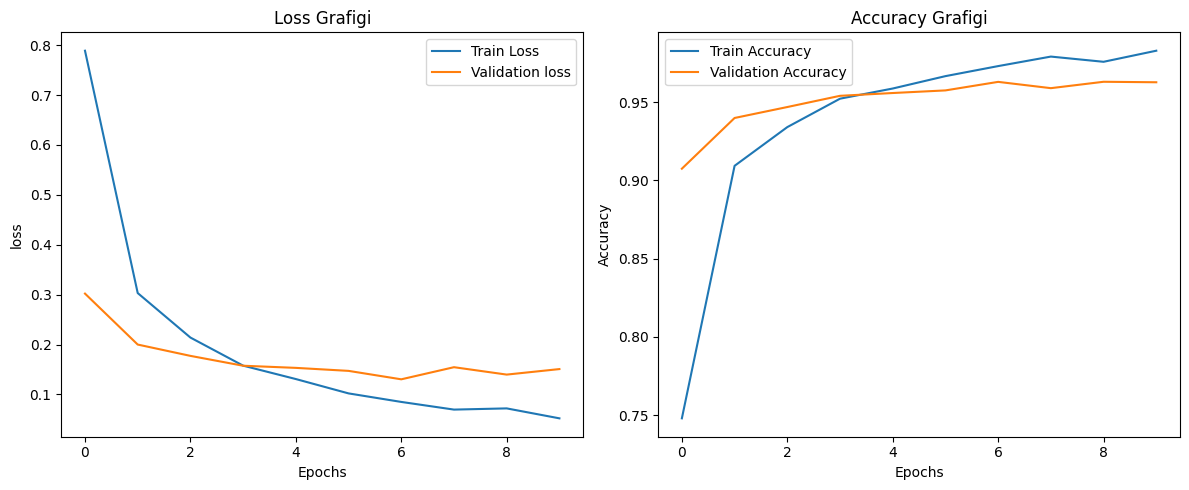

In [61]:
#egitim sonuçlarını görselleştirme
plt.figure(figsize=(12,5))

#loss grafigi
plt.subplot(1,2,1)
plt.plot(results2.history['loss'],label='Train Loss')
plt.plot(results2.history['val_loss'],label= 'Validation loss')
plt.title('Loss Grafigi')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()


#Accuracy grafigi
plt.subplot(1,2,2)
plt.plot(results2.history['accuracy'],label='Train Accuracy')
plt.plot(results2.history['val_accuracy'],label= 'Validation Accuracy')
plt.title('Accuracy Grafigi')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [62]:
y_prediction= model2.predict(X_test)
y_prediction_classes= np.argmax(y_prediction, axis=1)

#modelin degerlendirilmesi
test_loss2, test_accuracy2= model2.evaluate(X_test,y_test, verbose=0)
print('Loss:',test_loss2)
print('Accuracy:', test_accuracy2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Loss: 0.13545051217079163
Accuracy: 0.9656000137329102


In [63]:
 Evaluation.loc[2,'Yapay sinir Ağı']='Nöron Sayısını Arttırma'
 Evaluation.loc[2,'Accuracy']= test_accuracy2

## Sonuç


#### Derin ögrenme modelinde katman sayısını ve her katmandaki nöron sayısını ayarlayarak modelin kapasitesini ve karmaşıklıgı artırılabilir veya azaltabiliriz.Modelin ögrenme yetenegini ve perfomansını dogrudan etkilemektedir.

#### Aşagıdaki tabloda görüldügü üzere yapay sinir agında Normal  yapay sinir agına katman sayısı ve nöron sayısı ayrı ayrı eklenerek değerler gözlemlenmiştir.Verilerde artış gözlemleniştir. 

#### Bu ne kadar cok katman sayısı ve Nöron sayısı eklenirse artış gözlemleneceği anlamına gelmemektedir.Katman ve Nöron sayısı artıkça daha karmaşık hale gelir ve daha fazla özellik ögrenebilir ve  model yeni veriler üzerinde daha düşük performans gösterebilir. Buayarların dengeli yapılması önemlidir.

In [64]:
 Evaluation

,Yapay sinir Ağı,Accuracy
0,Normal,0.9595
1,Katman Sayısını Arttırma,0.9644
2,Nöron Sayısını Arttırma,0.9656
